In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('ebay_stocks_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-09-24 00:00:00-04:00,0.938201,0.951354,0.775989,0.830791,0.750675,518656090
1,1998-09-25 00:00:00-04:00,0.797910,0.808870,0.721188,0.786949,0.711061,121255834
2,1998-09-28 00:00:00-04:00,0.832983,0.892168,0.806678,0.846135,0.764539,89772883
3,1998-09-29 00:00:00-04:00,0.865863,0.881208,0.837367,0.857095,0.774443,39289536
4,1998-09-30 00:00:00-04:00,0.827502,0.841751,0.758453,0.790237,0.714032,44113766


In [2]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6651 entries, 0 to 6650
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6651 non-null   object 
 1   Open       6651 non-null   float64
 2   High       6651 non-null   float64
 3   Low        6651 non-null   float64
 4   Close      6651 non-null   float64
 5   Adj Close  6651 non-null   float64
 6   Volume     6651 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 363.9+ KB


In [6]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14196\2995962508.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
# Selecting features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [8]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

In [11]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2 Score": r2}
    print(f"{name} - MSE: {mse:.4f}, R2 Score: {r2:.4f}")

Linear Regression - MSE: 0.0469, R2 Score: 0.9998
Random Forest - MSE: 0.0827, R2 Score: 0.9997
Support Vector Machine - MSE: 1.0315, R2 Score: 0.9966
K-Nearest Neighbors - MSE: 0.2225, R2 Score: 0.9993


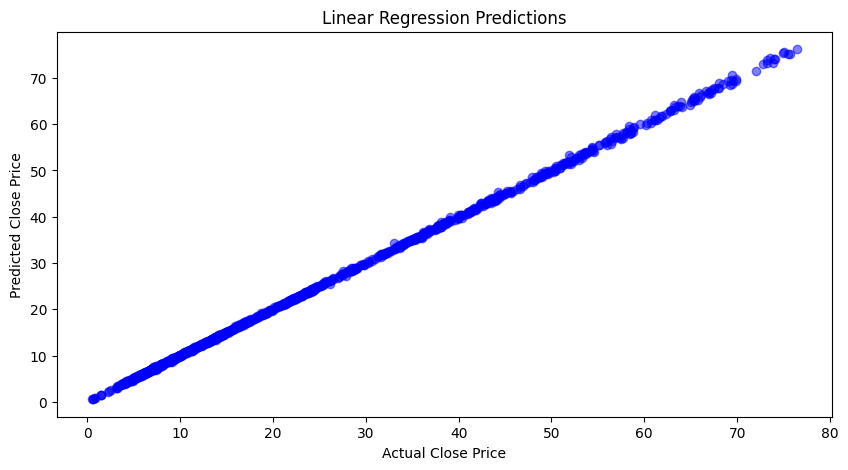

In [12]:
# Plot actual vs predicted for Linear Regression
plt.figure(figsize=(10, 5))
y_pred_lr = models["Linear Regression"].predict(X_test_scaled)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Linear Regression Predictions")
plt.show()

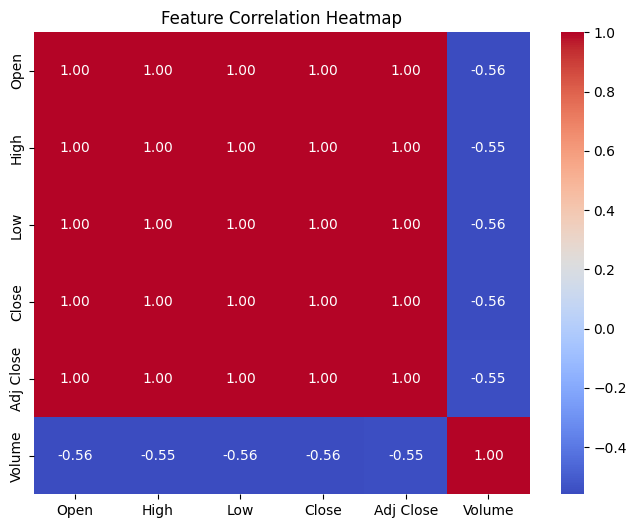

In [13]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

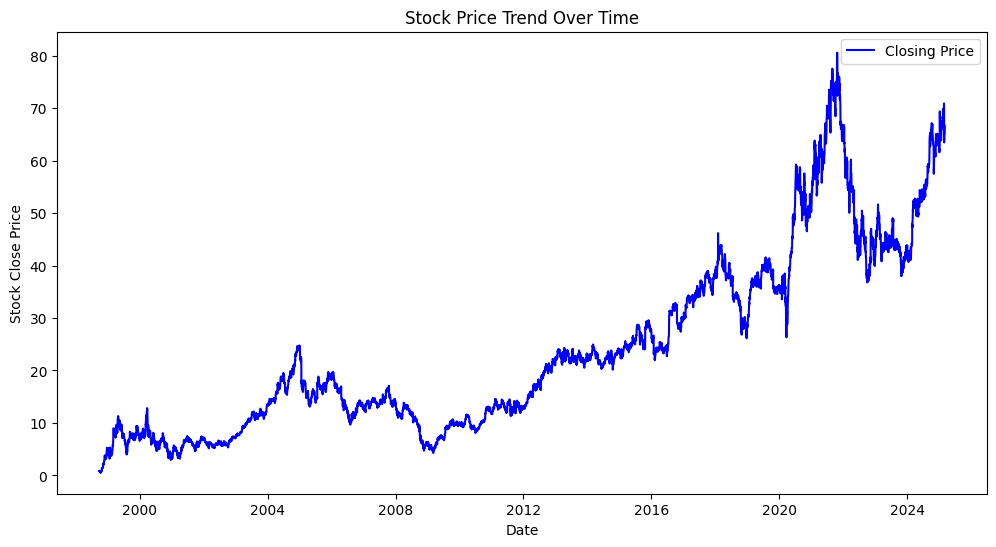

In [14]:
# Stock price trend
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='b')
plt.xlabel("Date")
plt.ylabel("Stock Close Price")
plt.title("Stock Price Trend Over Time")
plt.legend()
plt.show()

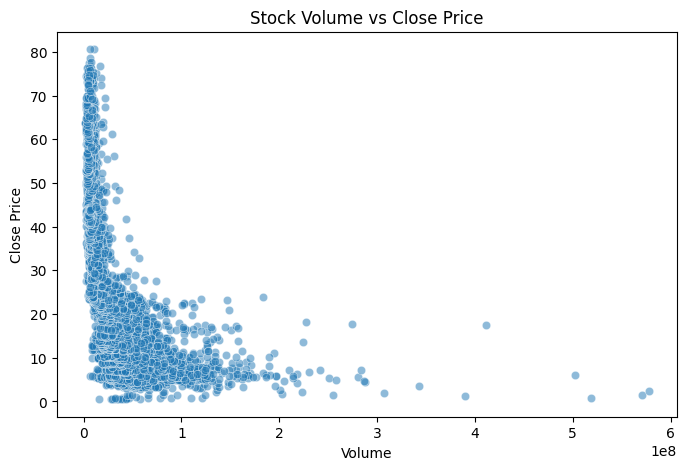

In [15]:
# Volume vs Close Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Volume'], y=df['Close'], alpha=0.5)
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.title("Stock Volume vs Close Price")
plt.show()

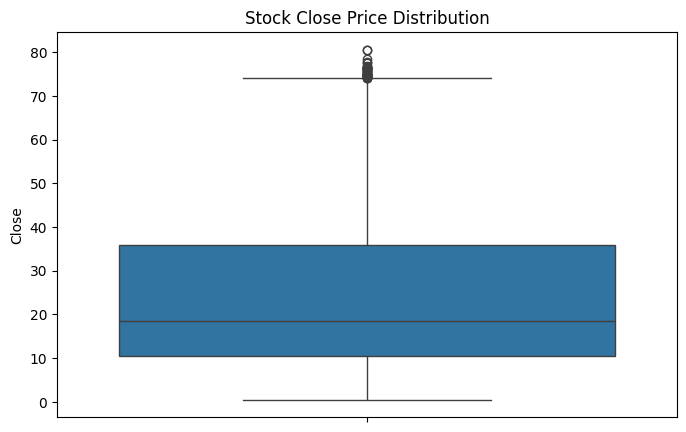

In [16]:
# Boxplot of stock prices
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Close'])
plt.title("Stock Close Price Distribution")
plt.show()